In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 文件路径
file_path = r'D:\MD_file\Corning\nov\size-effect\10k-cubecry_1000p.lmp'
# 
start_frame= 0
end_frame=990
step_frame= 30

In [3]:
# 每一个原子的信息
class Atom:
    def __init__(self, id0, type0, q, x, y, z, vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total):
        self.id = id0
        self.type = type0
        self.x = x
        self.y = y
        self.z = z
        self.q = q
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.fx = fx
        self.fy = fy
        self.fz = fz
        self.c_ke_atom = c_ke_atom
        self.c_pe_atom = c_pe_atom
        self.v_e_total = v_e_total

In [4]:
# 所有信息储存的总列表
list_all_frames = []
x_min,x_max,y_min,y_max,z_min,z_max = None,None,None, None,None,None
box_size = [None, None, None]
num_atom = None
len_per_frame = None
# 第一次打开,是看一下基本数据：
with open(file_path,'r') as f_open:
    # 前三行都不要
    for i in range(3): 
        f_open.readline()
    # 第四行是Number
    num_atom = int(f_open.readline())
    # 定义一页的行数
    len_per_frame = num_atom + 9  
    # 第五行不要
    f_open.readline()
    # 存储range范围
    temp_range_list = []
    for i in range(3): 
        temp_a,temp_b,temp_c = f_open.readline().split()
        temp_range_list.append(temp_a)
        temp_range_list.append(temp_b)
    # 将字符串转换为浮点数并直接赋值给变量
    x_min, x_max, y_min, y_max, z_min, z_max = [float(i) for i in temp_range_list]
print(f'Num of atom: {num_atom}')
print(f'X range: {x_min}  {x_max}')
print(f'Y range: {y_min}  {y_max}')
print(f'Z range: {z_min}  {z_max}\n')

# 开始读取文件
f_open = open(file_path,'r')
# 记录当前行数
count_row = 0
for i_frame in range(start_frame, end_frame, step_frame):
    print(f'Now is reading frame {i_frame}')
    list_frame = []
    # 先判断下是不是我要的这页
    now_frame_count = len_per_frame*i_frame
    # 如果不是同一页，则跳过这一页,再继续空读
    while count_row!=now_frame_count:
        # print(f'Now:{now_frame_count}  count:{count_row}')
        count_row+=len_per_frame
        for i in range(len_per_frame):
            f_open.readline()
    # 如果是同一页，那么就开始读取数据
    else:
        # print(f'Now:{now_frame_count}  count:{count_row}')
        # 首先就是跳过表头的9行
        for i in range(9):
            f_open.readline()
        # 再读取其余的数据
        for j_row in range(num_atom):
            temp_data = f_open.readline().split()
            id0, type0, q, x, y, z, vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total = [float(i) for i in temp_data]
            #print(id0, type0, q, x, y, z)
            temp_atom = Atom(id0, str(int(type0)), q, x, y, z, vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total)
            list_frame.append(temp_atom)
        # 这一页读取完毕了
        list_all_frames.append(list_frame)
        count_row+=len_per_frame
     
# 关闭文件
f_open.close()

Num of atom: 10003
X range: -0.11866323934476242  50.776632239346476
Y range: -0.11866323934476242  50.776632239346476
Z range: -0.11866323934476242  50.776632239346476

Now is reading frame 0
Now is reading frame 30
Now is reading frame 60
Now is reading frame 90
Now is reading frame 120
Now is reading frame 150
Now is reading frame 180
Now is reading frame 210
Now is reading frame 240
Now is reading frame 270
Now is reading frame 300
Now is reading frame 330
Now is reading frame 360
Now is reading frame 390
Now is reading frame 420
Now is reading frame 450
Now is reading frame 480
Now is reading frame 510
Now is reading frame 540
Now is reading frame 570
Now is reading frame 600
Now is reading frame 630
Now is reading frame 660
Now is reading frame 690
Now is reading frame 720
Now is reading frame 750
Now is reading frame 780
Now is reading frame 810
Now is reading frame 840
Now is reading frame 870
Now is reading frame 900
Now is reading frame 930
Now is reading frame 960


In [5]:
# 生成xyz格式文件
import os
out_xyz=0
if out_xyz == 1:
    # 若文件存在则删除
    if os.path.exists(out_path):
        os.remove(out_path)
    # 打开文件，以追加模式打开
    with open(out_path, 'a') as file:
        for i in list_all_frames:
            file.write('6500\n')
            file.write('Atoms\n')
            # 每一帧当中的代码
            for ii in i:
                file.write(list_type[ii.type-1] +' '+ str(ii.x) + ' '+ str(ii.y)+' '+str(ii.z) +'\n')
    print('output has been completed')

# 然后分析各种性质的均值

In [7]:
print('Data in list_all_frames')
print('vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total')

Data in list_all_frames
vx, vy, vz, fx, fy, fz, c_ke_atom, c_pe_atom, v_e_total


In [8]:
list_all_frames[0][0].type

'1'

In [74]:
# 1 2 3 4
# O Si Al L
ana_type = '4'

In [76]:
# 分析均值的变化
mean_list = []
for i_frame in list_all_frames:
    sum_list = np.array([0.0,0.0,0.0])
    count_num = 0
    for j_atom in i_frame:
        # 再来个筛选元素种类的
        if j_atom.type ==ana_type:
            temp_list = [j_atom.c_ke_atom,j_atom.c_pe_atom,j_atom.v_e_total]
            temp_list = np.array(temp_list)
            sum_list+=temp_list
            count_num+=1
    sum_list/=count_num
    mean_list.append(sum_list)
mean_list = np.array(mean_list)


In [78]:
len(mean_list)

33

In [80]:
type_dic = {'1':'O','2':'Si','3':'Al','4':'Li'}
type_dic[ana_type]

'Li'

In [82]:
ana_name = ', type:'+ type_dic[ana_type] + ', 10K-cube'

In [84]:
def ana_list(temp_list):
    # 创建示例数组
    data = np.array(temp_list)
    # 计算均值
    mean = np.mean(data)
    # 计算方差
    variance = np.var(data)
    # 计算标准差
    std_deviation = np.std(data)
    # 输出结果
    #print(f"数组: {data}")
    print(f"均值: {round(mean,5)}")
    # print(f"方差: {round(variance,5)}")
    print(f"标准差: {round(std_deviation,5)}")
    return None

均值: 0.23321
标准差: 0.00609


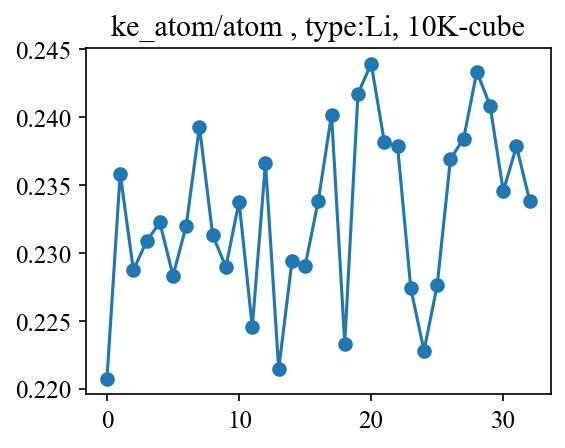

In [86]:
plt.figure(figsize = (4,3))
ana_pro_list = np.array([i[0] for i in mean_list])
plt.plot(range(len(mean_list)),ana_pro_list, marker='o', linestyle='-')
plt.title('ke_atom/atom {}'.format(ana_name))
ana_list(ana_pro_list[2:])

Text(0.5, 1.0, 'pe_atom/atom , type:Li, 10K')

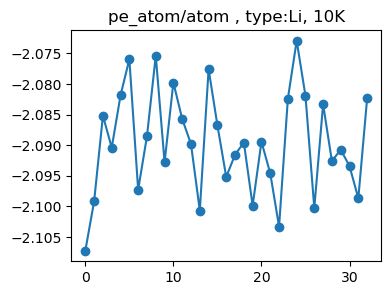

In [16]:
plt.figure(figsize = (4,3))
plt.plot(range(len(mean_list)),[i[1] for i in mean_list], marker='o', linestyle='-')
plt.title('pe_atom/atom {}'.format(ana_name))

Text(0.5, 1.0, 'totalE/atom , type:Li, 10K')

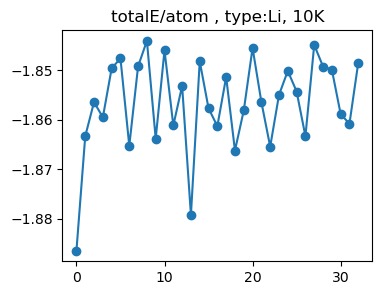

In [17]:
plt.figure(figsize = (4,3))
plt.plot(range(len(mean_list)),[i[2] for i in mean_list], marker='o', linestyle='-')
plt.title('totalE/atom {}'.format(ana_name))

# 分析ke，pe，以及e_total三种能量的分布情况

In [19]:
# 分析数据选项
ana_frame = 0

# 分析类别 1是总能量，2是动能，3是势能
#  11vx, 12vy, 13vz,   21fx, 22fy, 23fz

ana_type_num = 2

# 分析原子的类型
# 此处 O Si Al Li
ana_element_type = ['1']

# 切分份数
x_split_size = 40
y_split_size = 30

In [20]:
# 读取数据，假设x和y分别为x轴和y轴的数据，z为能量数据
list_x = []
list_y = []
list_z = []
list_ana = []
# 分析能量值 pe ke or e_total
if ana_type_num == 1:
    ana_type = 'Total energy'
elif ana_type_num == 2:
    ana_type = 'Knetic energy'
elif ana_type_num == 3:
    ana_type = 'Potential energy'
elif ana_type_num == 11:
    ana_type = 'Velocity_x'
elif ana_type_num == 12:
    ana_type = 'Velocity_y'
elif ana_type_num ==13:
    ana_type = 'Velocity_z'
elif ana_type_num == 21:
    ana_type = 'Acceleration_x'
elif ana_type_num == 22:
    ana_type = 'Acceleration_y'
elif ana_type_num == 23:
    ana_type = 'Acceleration_z'
    
    
# 此处并不是把每一帧的数据都放进去，而是选择某一帧进行分析
i = list_all_frames[ana_frame]
for ii in i:
    # 先筛选元素
    if str(ii.type) in ana_element_type:   
        list_x.append(ii.x)    
        list_y.append(ii.y)
        list_z.append(ii.z)
        # 再筛选类型 
        if ana_type_num == 1:
            list_ana.append(ii.v_e_total)
        elif ana_type_num==2:
            list_ana.append(ii.c_ke_atom)
            #print(ii.c_ke_atom)
        elif ana_element_type==3:
            list_ana.append(ii.c_pe_atom)
        elif ana_type_num ==21:
            list_ana.append(ii.fx)
        elif ana_type_num==22:
            list_ana.append(ii.fy)
        elif ana_type_num==23:
            list_ana.append(ii.fz)
        elif ana_type_num==11:
            list_ana.append(ii.vx)
        elif ana_type_num==12:
            list_ana.append(ii.vy)
        elif ana_type_num==13:
            list_ana.append(ii.vz)
        else:
            print('Input Error!')

In [21]:
len(list_all_frames)

33

C:\Users\81004\AppData\Local\Temp\ipykernel_13880\2620049084.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlOrRd")
C:\Users\81004\AppData\Local\Temp\ipykernel_13880\2620049084.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlOrRd")


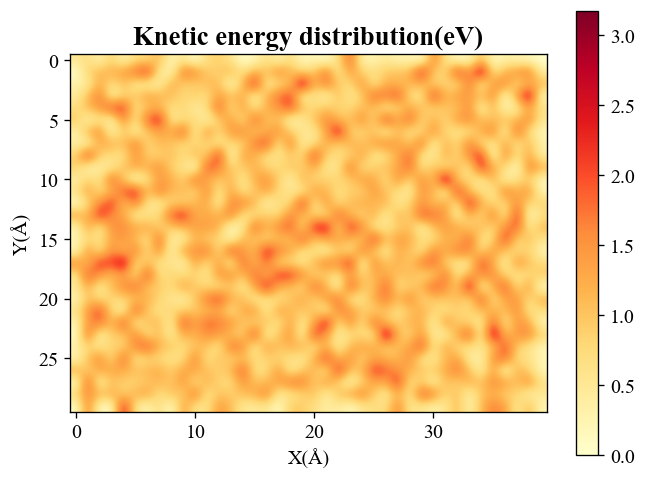

Analysis frame: 0
Analysis type: Knetic energy  Total energy: 1251.697480333


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.colors as mcolors
# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
# 设置局部字体
font = FontProperties()
font.set_family('Times New Roman')
# 创建绘图窗口
fig = plt.figure(dpi=120)

# 将x，y，energy转化为numpy数组
x = np.array(list_x)
y = np.array(list_y)

# 辨别分析的能量类型
energy  = np.array(list_ana)

# 设置xy网格
x_grid = np.linspace(x.min(), x.max(), x_split_size)
y_grid = np.linspace(y.min(), y.max(), y_split_size)
X, Y = np.meshgrid(x_grid, y_grid)

# 计算每个网格上的总能量
total_energy = np.zeros_like(X)
for i in range(len(x)):
    # 找到x，y所在的网格
    x_idx = np.abs(x_grid - x[i]).argmin()
    y_idx = np.abs(y_grid - y[i]).argmin()
    # 将能量加到所在网格上
    total_energy[y_idx, x_idx] += energy[i]

plt.xlabel('X(Å)', fontproperties=font, fontsize=12)
plt.ylabel('Y(Å)', fontproperties=font, fontsize=12)

# 定义颜色映射，红色表示较小值，蓝色表示较大值
# 设置字体
font = {'family': 'Times New Roman',
        'weight': 'bold',
        'size': 12}

# 设置图像的分辨率为300像素/英寸
plt.rcParams['figure.dpi'] = 150


# 定义颜色映射，红色表示较小值，蓝色表示较大值
cmap = plt.cm.get_cmap("YlOrRd")

# 定义颜色边界
bounds = np.linspace(0, 5, 6)
# norm = mcolors.BoundaryNorm(bounds, cmap.N)

# 绘制热力图
cmap = plt.cm.get_cmap("YlOrRd")
norm = mcolors.BoundaryNorm(bounds, cmap.N)
# 绘制能量分布图
# plt.pcolormesh(X, Y, total_energy,cmap= 'RdYlBu_r')
# 绘制热力图
plt.imshow(total_energy, cmap=cmap,interpolation='bicubic')

plt.colorbar()
title_name = ana_type + ' distribution(eV)'

plt.title(title_name,fontproperties=font, fontsize=16)

#
plt.show()

# 计算总能量
print('Analysis frame:',str(ana_frame))
total_energy_sum = np.sum(total_energy)
print('Analysis type:',ana_type,' Total energy:',total_energy_sum)

# 统计晶体区域和非晶区域的能量差别

In [24]:
ana_num =  1600

c_x1,c_x2 = 35,60
g_x1,g_x2 = 0,110
# 分析元素类型
# 1O  2Nb   3Li
sts_element = 3
# 分析能量类型
# 1e  2pe    3ke
sts_type = 1

In [25]:
# 统计两个区域原子的信息
list_location = list_all_frames[ana_num]
list_glass_e = []
list_cry_e = []
list_glass_x,list_cry_x = [],[]
for i in list_location:
    # 晶体区域
    if c_x1<i.x<c_x2 and i.type== sts_element:
        list_cry_e.append([i.v_e_total,i.c_pe_atom,i.c_ke_atom])
        list_cry_x.append(i.x)
    if g_x1 <i.x< g_x2 and i.type==sts_element:
        list_glass_e.append([i.v_e_total,i.c_pe_atom,i.c_ke_atom])
        list_glass_x.append(i.x)

IndexError: list index out of range

In [ ]:
# 筛选出需要分析的能量类型
sts_titleName = 'None'
sts_glass_e,sts_cry_e =[],[]
# 补足画图所用的横坐标
glass_x,cry_x = [],[]
ii = 0
for i in list_glass_e:
    glass_x.append(ii)
    ii+=1
    if sts_type == 1:
        sts_titleName = "Total Energy"
        sts_glass_e.append(i[0])
    elif sts_type == 2:
        sts_titleName = "Potential Energy"
        sts_glass_e.append(i[1])
    elif sts_type == 3:
        sts_titleName = "Knetic Energy"
        sts_glass_e.append(i[2])
# 再统计
jj = 0
for i in list_cry_e:
    cry_x.append(jj)
    jj+=1
    if sts_type == 1:
        sts_cry_e.append(i[0])
    elif sts_type == 2:
        sts_cry_e.append(i[1])
    elif sts_type == 3:
        sts_cry_e.append(i[2])

In [ ]:
import statistics
ana_element_name = 'Nb'
if sts_element==1:
    ana_element_name ='O'
elif sts_element==3:
    ana_element_name ='Li'

# 
print('Element: ',ana_element_name,' Ana_frame: ',ana_num)

plt.figure(dpi=120)
# 玻璃区域

plt.scatter(list_glass_x,sts_glass_e, c='r',s=2,label= 'glass')
# 绘制 均值水平线
plt.axhline(statistics.mean(sts_glass_e), color='red', linestyle='--',label='glass Emean')
plt.xlabel('X (Å)')
plt.ylabel('Energy (eV)')
# 绘制 中位数水平线
#plt.axhline(statistics.median(sts_glass_e), color='red', linestyle='-.',label='glass Emedian')

# 晶体区域
plt.scatter(list_cry_x, sts_cry_e, c='b',s=2,label="crtsyal")
# 绘制 均值水平线
plt.axhline(statistics.mean(sts_cry_e), color='b', linestyle='-.',label='crystal Emean')
# 绘制 中位数水平线
#plt.axhline(statistics.median(sts_cry_e), color='b', linestyle='--',label='cry Emedian')
plt.title(sts_titleName)
plt.legend()
plt.show()

# 要分析沿x方向的能量分布

In [ ]:
# 菜单栏
start_frame = 0
step_frame = 500
end_frame = 2001
# 将要分析的元素
xd_ana_element = 2
# 分析能量类型 1e 2pe 3ke 4密度或者说原子数
xd_ana_type = 1
# 精度 每隔多远设为同一格
delta = 1

In [ ]:
import math
# 多个帧数的数据总集合
x_direction_all_list = []
# 计数有多少个帧数
count = 0
frame_list = []
count_list = []
for frame in range(start_frame,end_frame,step_frame):
    count += 1
    xd_max_x = float('-inf')
    # 取出当前帧
    xd_all_atom_list = list_all_frames[frame]
    xd_ana_atom =[]
    # 筛选数据     
    for i in xd_all_atom_list:
        if i.x>xd_max_x:
            xd_max_x = i.x
        # 记录当下这个原子的能量
        energy_temp = 0
        if i.type == xd_ana_element:
            if xd_ana_type == 1:
                energy_temp = i.v_e_total
            elif xd_ana_type == 2:
                energy_temp = i.c_pe_atom
            elif xd_ana_type == 3:
                energy_temp =i.c_ke_atom
            xd_ana_atom.append([i.type, i.x, energy_temp])
            #elif xd_ana_type == 4:
                # 来个数量计数
               # energy_temp.append(1)
            
    
    # 根据x位置计算点的能量
    interval_num = math.floor(xd_max_x/delta)
    xd_e_list = np.zeros(interval_num)
    xd_count = np.zeros(interval_num)
    xd_e_list_x = []
    for i in xd_ana_atom :
        if i[1]< delta* interval_num:   
            pos = math.floor(i[1]/delta)
            xd_e_list[pos]+= i[2]
            xd_count[pos]+=1
    # 最后求均值
    for i in range(len(xd_e_list)):
        xd_e_list_x.append(i)
        if xd_count[i]!=0:
            xd_e_list[i] = xd_e_list[i]/xd_count[i] 
    # print(len(xd_e_list_x),len(xd_e_list))
    x_direction_all_list.append([xd_e_list_x, xd_e_list])
    
    frame_list.append(frame)
    count_list.append(xd_count)

# if xd_ana_type == 4:
#     print('Frame: ',frame_list)
#     x_direction_all_list=count_list
#     xd_x = [0 + i * 1 for i in range(len(x_direction_all_list[0]))]
#     color = ['r','orange','green','blue','purple','r','orange','green','blue','purple','r','green','blue','purple']
#     fig, axes = plt.subplots(len(x_direction_all_list), 1, figsize=(5, 6))
#     for i in range(len(x_direction_all_list)):
#         axes[i].plot(xd_x, x_direction_all_list[i],c=color[i])
#         if i!=len(x_direction_all_list)-1:
#             axes[i].set_xticklabels([])
#         axes[i].set_xlim(0,len(x_direction_all_list[0]))
#         axes[i].set_ylim(180,220)

In [ ]:
print('Frame: ',frame_list)
# 
color = ['r','orange','green','blue','purple','r','orange','green','blue','purple','r','green','blue','purple']
# 创建子图
fig, axes = plt.subplots(len(x_direction_all_list), 1, figsize=(5, 6))

for i in range(len(x_direction_all_list)):
    axes[i].plot(x_direction_all_list[i][0], x_direction_all_list[i][1],c=color[i])
    if i!=len(x_direction_all_list)-1:
        axes[i].set_xticklabels([])
    axes[i].set_xlim(0,len(x_direction_all_list[0][0]))
    #axes[i].set_ylim(-45.5,-41)

In [ ]:
# 输出单帧中原子数类型以及数量
type_1,type_2,type_3 = 0,0,0
Nb_ke,O_ke,Li_ke = 0,0,0
for atom in list_all_frames[0]:
    if atom.type==1:
        O_ke = atom.c_ke_atom
        type_1+=1
    elif atom.type==2:
        Nb_ke = atom.c_ke_atom
        type_2+=1
    elif atom.type==3:
        Li_ke = atom.c_ke_atom
        type_3+=1
print('Num_O:',type_1,' num_Nb: ',type_2,' num_Li: ',type_3)
print('Ke_O:',O_ke,' Ke_Nb: ',Nb_ke,' Ke_Li: ',Li_ke)

# 算一下离子能量下降随时间变化的曲线

In [ ]:
# 步数
start_frame = 0
step_frame = 1
end_frame = 2001
# 将要分析的元素
xd_ana_element = 2
# 分析能量类型 1e 2pe 3ke 4密度或者说原子数 此处只关注total e
xd_ana_type = 1

In [ ]:
#  原子数
num_atom = 0
sum_energy2 = []

sum_energy_x = []
for frame in range(start_frame,end_frame,step_frame):
    # 一帧的数据
    frame_list = list_all_frames[frame]
    sum_energy_x.append(frame)
    # 单帧的能量总值
    frame_energy = 0
    for atom in frame_list:
        if atom.type == xd_ana_element:
            frame_energy += atom.v_e_total
    sum_energy2.append(frame_energy) 


plt.title('The change in O total energy over timesteps')
plt.plot(sum_energy_x, sum_energy2 ,color='blue')

In [ ]:
plt.figure(figsize=(15,5))
plt.title('The change in Nb total energy over timesteps')
plt.plot(sum_energy_x, sum_energy2 ,color='blue')

In [ ]:
# 计算

In [ ]:
import math
xd_ana_num = 0
# 单帧元素列表
xd_all_atom_list = list_all_frames[xd_ana_num]
# 筛选出需要分析的能量类型
xd_titleName = 'None'
xd_ana_atom =[]

# 画图
if xd_ana_type == 1:
    xd_titleName = "Total Energy"
elif xd_ana_type == 2:
    xd_titleName = "Potential Energy"
elif xd_ana_type == 3:
    xd_titleName = "Knetic Energy"
    
# 筛选数据     
for i in xd_all_atom_list:
    if i.x>xd_max_x:
        xd_max_x = i.x
    energy_temp = 0
    if i.type == xd_ana_element:
        if xd_ana_type == 1:
            energy_temp = i.v_e_total
        elif xd_ana_type == 2:
            energy_temp = i.c_pe_atom
        elif xd_ana_type == 3:
            energy_temp =i.c_ke_atom
        xd_ana_atom.append([i.type, i.x, energy_temp])

In [ ]:
# 根据x位置计算点的能量
interval_num = math.floor(xd_max_x/delta)
xd_e_list = np.zeros(interval_num)
xd_count = np.zeros(interval_num)
xd_e_list_x = []
for i in xd_ana_atom :
    if i[1]< delta* interval_num:   
        pos = math.floor(i[1]/delta)
        xd_e_list[pos]+= i[2]
        xd_count[pos]+=1
        
        
# 最后求均值
for i in range(len(xd_e_list)):
    xd_e_list_x.append(i)
    if xd_count[i]!=0:
        xd_e_list[i] = xd_e_list[i]/xd_count[i] 


In [ ]:
len(x_direction_all_list[4:])

In [ ]:
plt.plot(xd_e_list_x,xd_e_list)
plt.xlim(0,105)

In [ ]:
import numpy as np

# 原子的xyz坐标数据
coordinates = np.array([[1.0, 2.0, 3.0],
                       [2.0, 3.0, 4.0],
                       [3.0, 4.0, 5.0],
                       [4.0, 5.0, 6.0],
                       [5.0, 6.0, 7.0]])

# 对应的能量分布
energies = np.array([10.0, 15.0, 20.0, 25.0, 30.0])

# 定义每隔1.0距离的空间的起始位置和结束位置
start = coordinates[:, 0].min()
end = coordinates[:, 0].max()
step = 1.0

# 计算空间区间数量
num_intervals = int((end - start) / step) + 1

# 初始化空间区间的能量和计数
energy_sum = np.zeros(num_intervals)
count = np.zeros(num_intervals)

# 遍历原子坐标和能量，将能量分布累加到相应的空间区间
for coord, energy in zip(coordinates, energies):
    interval_index = int((coord[0] - start) // step)
    energy_sum[interval_index] += energy
    count[interval_index] += 1

# 计算平均能量分布
average_energies = np.divide(energy_sum, count, out=np.zeros_like(energy_sum), where=count != 0)

# 打印平均能量分布
print(average_energies)


# 定量分析

In [ ]:
print("数据详情")
print("晶体区域能量分析 极大值: ",max(sts_cry_e)," 极小值: ",min(sts_cry_e)," 均值: ",round(statistics.mean(sts_cry_e),3)," 中位数:",statistics.median(sts_cry_e))
print("玻璃区域能量分析 极大值: ",max(sts_cry_e)," 极小值: ",min(sts_glass_e)," 均值: ",round(statistics.mean(sts_glass_e),3)," 中位数:",statistics.median(sts_glass_e))
print("对比分析")
print("均值差异:",statistics.mean(sts_glass_e)-statistics.mean(sts_cry_e))
print("中位数差异:",statistics.median(sts_glass_e)-statistics.median(sts_cry_e))


In [ ]:
import pandas as pd


df1 = pd.DataFrame(list_cry_e)
# 使用describe()函数计算统计量
statistics1 = df1.describe()

df2 = pd.DataFrame(list_glass_e)
# 使用describe()函数计算统计量
statistics2 = df2.describe()

print('cry_total_e:\n',statistics1)

print('glass_total_e:\n',statistics2)

In [ ]:
# 计算晶体区域和非晶区域的能量差别
e_cry = 0
count_cry_atom = 0

g_count_ele = {'1':0,'2':0, '3':0}
c_count_ele = {'1':0,'2':0, '3':0}

g_e_dic = {'Nb_total_e':0 ,'Nb_ave_e':0 ,'Nb_all_Ke':0 ,'Nb_ave_ke':0  ,'Nb_all_pe':0  ,'Nb_ave_pe':0,
           'Li_total_e':0 ,'Li_ave_e':0 ,'Li_all_Ke':0 ,'Li_ave_ke':0  ,'Li_all_pe':0  ,'Li_ave_pe':0,
           'O_total_e':0  ,'O_ave_e':0  ,'O_all_Ke':0  ,'O_ave_ke':0    ,'O_all_pe':0  ,'O_ave_pe':0}

c_e_dic = {'Nb_total_e':0,'Nb_ave_e':0,'Nb_all_Ke':0,'Nb_ave_ke':0,'Nb_all_pe':0,'Nb_ave_pe':0,
           'Li_total_e':0, 'Li_ave_e':0,'Li_all_Ke':0,'Li_ave_ke':0,'Li_all_pe':0,'Li_ave_pe':0,
           'O_total_e':0,'O_ave_e':0,'O_all_Ke':0,'O_ave_ke':0,'O_all_pe':0,'O_ave_pe':0}
# 
e_glass = 0
count_glass_atom = 0

cal_list = list_all_frames[ana_num]

# 计算区域的总能量
for i in cal_list:
    # cry 50-60
    if c_x1<i.x<c_x2:
        count_cry_atom+=1
        e_cry+=i.v_e_total
        
        if i.type == 1:
            c_count_ele['1']+=1
            c_e_dic['O_total_e'] += i.v_e_total
            c_e_dic['O_all_Ke'] += i.c_ke_atom
            c_e_dic['O_all_pe'] += i.c_pe_atom
            
        if i.type == 2:
            c_count_ele['2']+=1
            c_e_dic['Nb_total_e'] += i.v_e_total
            c_e_dic['Nb_all_Ke'] += i.c_ke_atom
            c_e_dic['Nb_all_pe'] += i.c_pe_atom
        if i.type == 3:
            c_count_ele['3']+=1
            c_e_dic['Li_total_e'] += i.v_e_total
            c_e_dic['Li_all_Ke'] += i.c_ke_atom
            c_e_dic['Li_all_pe'] += i.c_pe_atom
            
    elif g_x1 <i.x< g_x2:
        count_glass_atom+=1
        e_glass+=i.v_e_total
        
        if i.type == 1:
            g_count_ele['1']+=1
            g_e_dic['O_total_e'] += i.v_e_total
            g_e_dic['O_all_Ke'] += i.c_ke_atom
            g_e_dic['O_all_pe'] += i.c_pe_atom
            
        if i.type == 2:
            g_count_ele['2']+=1
            g_e_dic['Nb_total_e'] += i.v_e_total
            g_e_dic['Nb_all_Ke'] += i.c_ke_atom
            g_e_dic['Nb_all_pe'] += i.c_pe_atom
        if i.type == 3:
            g_count_ele['3']+=1
            g_e_dic['Li_total_e'] += i.v_e_total
            g_e_dic['Li_all_Ke'] += i.c_ke_atom
            g_e_dic['Li_all_pe'] += i.c_pe_atom
            
print('分析第',ana_num,'帧')        
print('晶体中所有元素的平均总能量：',e_cry/count_cry_atom,' 玻璃中所有元素的平均总能量：',e_glass/count_glass_atom)
print('等体积中晶体和玻璃的原子数量:')
print('晶体：',count_cry_atom,' 玻璃：',count_glass_atom)
print('晶体中原子数分布 ','Nb:',c_count_ele['2'],' O:',c_count_ele['1'],' Li: ',c_count_ele['3'])
print('玻璃中原子数分布 ','Nb:',g_count_ele['2'],' O:',g_count_ele['1'],' Li: ',g_count_ele['3'],'\n')
print('晶体中不同元素的能量对比','Nb原子平均总能:',c_e_dic['Nb_total_e']/c_count_ele['2'],' Nb原子平均动能：',c_e_dic['Nb_all_Ke']/c_count_ele['2'],' Nb原子平均势能：',c_e_dic['Nb_all_pe']/c_count_ele['2'])
print('玻璃中不同元素的能量对比','Nb原子平均总能:',g_e_dic['Nb_total_e']/g_count_ele['2'],' Nb原子平均动能：',g_e_dic['Nb_all_Ke']/g_count_ele['2'],' Nb原子平均势能：',g_e_dic['Nb_all_pe']/g_count_ele['2'],)
print(' ')
print('晶体中不同元素的能量对比','O原子平均总能:',c_e_dic['O_total_e']/c_count_ele['1'],' O原子平均动能：',c_e_dic['O_all_Ke']/c_count_ele['1'],' O原子平均势能：',c_e_dic['O_all_pe']/c_count_ele['1'])
print('玻璃中不同元素的能量对比','O原子平均总能:',g_e_dic['O_total_e']/g_count_ele['1'],' O原子平均动能：',g_e_dic['O_all_Ke']/g_count_ele['1'],' O原子平均势能：',g_e_dic['O_all_pe']/g_count_ele['1'])
print(' ')
print('晶体中不同元素的能量对比','Li原子平均总能:',c_e_dic['Li_total_e']/c_count_ele['3'],' Li原子平均动能：',c_e_dic['Li_all_Ke']/c_count_ele['3'],' Li原子平均势能：',c_e_dic['Li_all_pe']/c_count_ele['3'])
print('玻璃中不同元素的能量对比','Li原子平均总能:',g_e_dic['Li_total_e']/g_count_ele['3'],' Li原子平均动能：',g_e_dic['Li_all_Ke']/g_count_ele['3'],' Li原子平均势能：',g_e_dic['Li_all_pe']/g_count_ele['3'])




# 分析单个粒子的能量变化

In [ ]:
# 分析原子id（类型用来检查）
ana_element_index = 11653
ana_element_index_type = 3
# 分析起始位置和步长
start_frame_ana_e = 0
end_frame_ana_e = 2000
step_frame_ana_e = 20
# 分析类型有 1e  2pe  3ke
ana_energy_type = 1

In [ ]:
# 记录粒子的时间和能量的列表
single_energy_list_e_y = []
single_energy_list_time_x = []
for i_e in range(start_frame_ana_e,end_frame_ana_e,step_frame_ana_e):
    # 取出一帧
    list_temp = list_all_frames[i_e]
    # 找到关注的原子
    for ii_e in list_temp:
        if ii_e.id == ana_element_index:
            # list[e,pe,ke]
            single_energy_list_e_y.append([ii_e.v_e_total,ii_e.c_pe_atom,ii_e.c_ke_atom])
            single_energy_list_time_x.append(i_e)

In [ ]:
list_e,list_pe,list_ke = [],[],[]
for i in single_energy_list_e_y:
    list_e.append(i[0])
    list_pe.append(i[1])
    list_ke.append(i[2])

In [ ]:
# 分析类型有 1e  2pe  3ke
ana_energy_type = 3
# 画图
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


# 设置局部字体
font = FontProperties()
font.set_family('Times New Roman')
# 设置字体加粗
font.set_weight('bold')
font.set_size(12)
# 创建绘图窗口
# 创建绘图窗口
# 根据分析类型加上名称
if ana_energy_type == 1:
    title_name1 = 'Total Energy'
    list_y_temp = list_e 
elif ana_energy_type == 2:
    title_name1 = 'Potential energy'
    list_y_temp = list_pe
else:
    title_name1 = 'Knetic energy'
    list_y_temp = list_ke 
    
    
fig = plt.figure(dpi=120)
plt.plot(sigle_energy_list_time_x, list_y_temp)
plt.title(title_name1,fontproperties=font,fontsize=16)
# 设置 X 轴和 Y 轴坐标数字的字体为加粗
plt.xlabel('Time step(0-10ns)', fontproperties=font, fontsize=12)
plt.ylabel('Energy(ev)', fontproperties=font, fontsize=12)

plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.show()

In [ ]:
# 画图
plt.title('pe')
plt.plot(sigle_energy_list_time_x,list_pe)
plt.show()

In [ ]:
plt.title('ke')
plt.plot(sigle_energy_list_time_x,list_ke)
plt.show()